# ML Assignment 6: Supervised Model Comparison and k-Means Clustering

In [146]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

# Supervised Learning Model Comparison 

## 1. Initial Exploration and Pre-Processing

### 1.1 Load the dataset and perform an initial exploration to understand its structure and content.

In [2]:
url = 'https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv'
df = pd.read_csv(url)


In [3]:
# first 5 row of the dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# last 5 row of the dataset
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
# shape of the dataset
rows,columns = df.shape
print(f'No.of.rows : {rows}')
print(f'No.of.columns : {columns}')

No.of.rows : 2938
No.of.columns : 22


In [6]:
# information of the datatype in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# descriptive statistics of the dataset
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
# remove the heading space in the columns 
df.columns = df.columns.str.strip()
df.columns
    

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### 1.2 Determine the number of unique values in the 'Country' and 'Year' columns.

In [9]:
columns = df.columns
for i in columns:
    print(df[i].value_counts())
    print('\n')
    print('-'*80)
    print('\n')

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64


--------------------------------------------------------------------------------


Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64


--------------------------------------------------------------------------------


Status
Developing    2426
Developed      512
Name: count, dtype: int64


--------------------------------------------------------------------------------


Life expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.

### 1.3 Analyze the distribution of values in the 'Status' column. If the dataset is imbalanced, consider using appropriate metrics for evaluation.

 # The status column contains imbalance class 
 # developing - 2426
 # developed - 512

 # so accuracy is not good evaluation metric, for model considering percision, recall and F-1 score, confusion matrix and ROC-AOU Score

### 1.4 Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy.

In [10]:
# check for null values in the dataset
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# check percentage of the null value in the column
null_value_columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio','Total expenditure',
                      'Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years','thinness 5-9 years',
                      'Income composition of resources','Schooling']
percentage_null_value =(df[null_value_columns].isnull().sum() / len(df)) * 100
percentage_null_value

Life expectancy                     0.340368
Adult Mortality                     0.340368
Alcohol                             6.603131
Hepatitis B                        18.822328
BMI                                 1.157250
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64

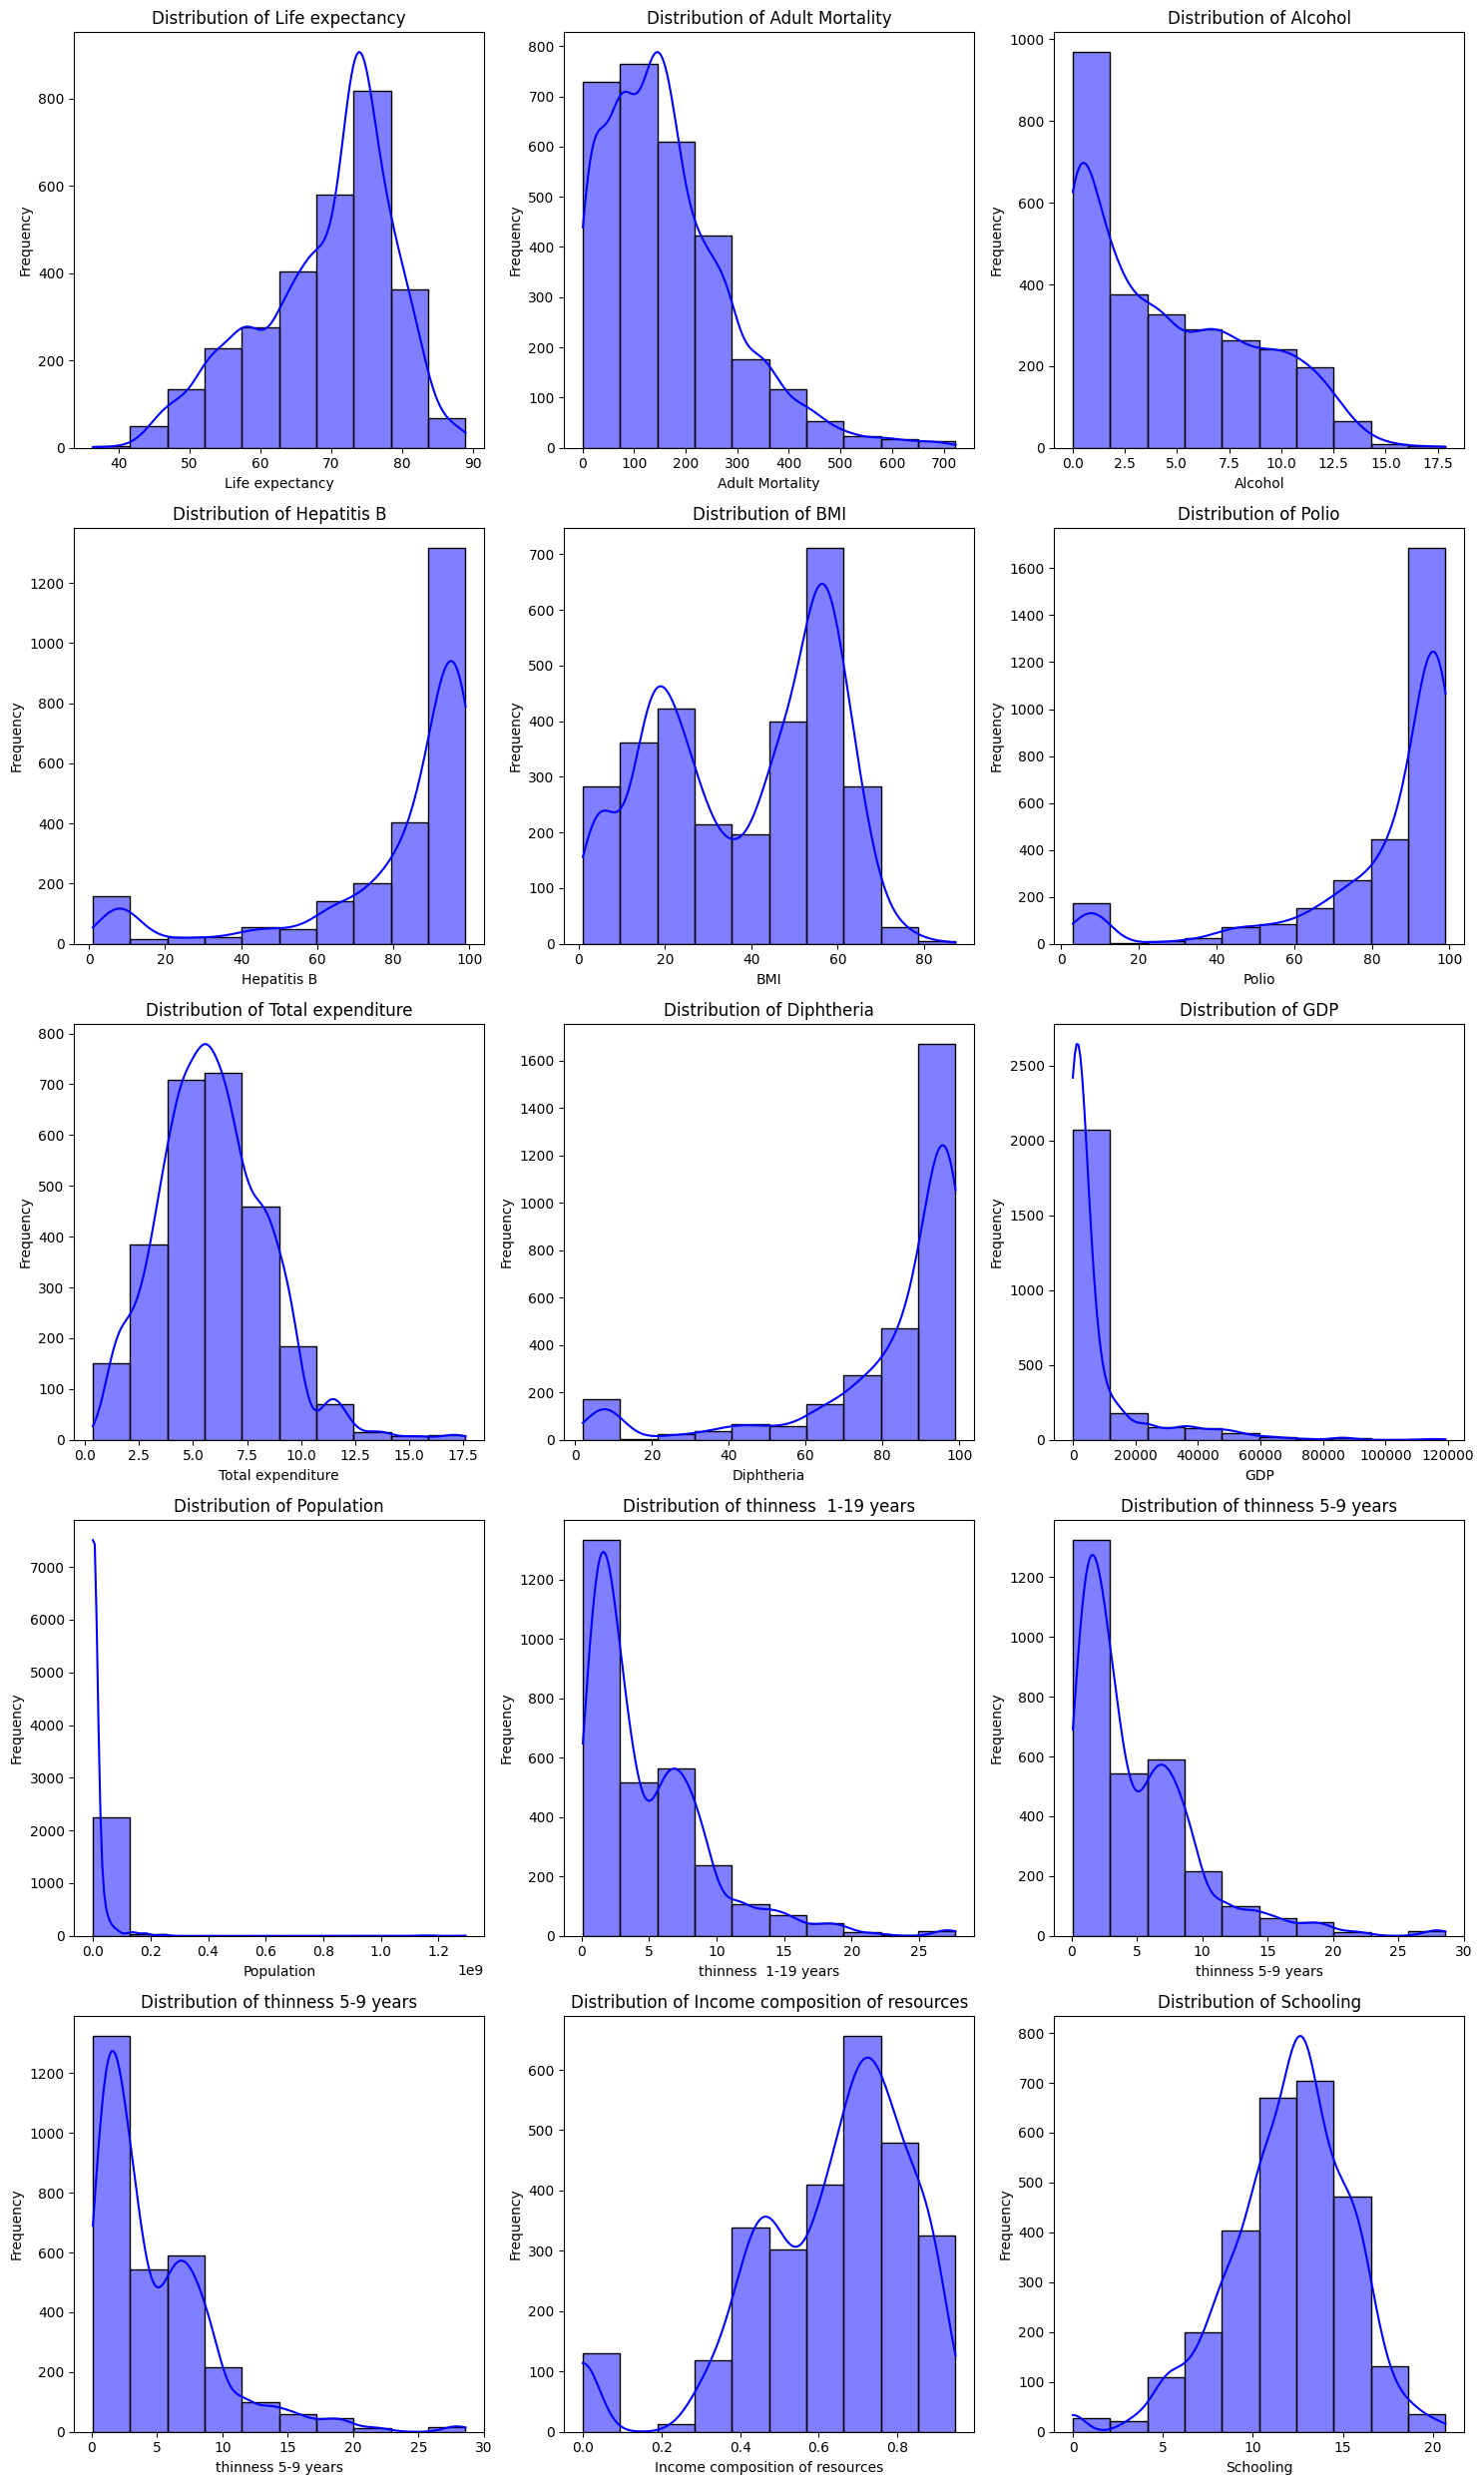

In [12]:
# data distribution in the null value columns
null_value_columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio','Total expenditure',
                      'Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years','thinness 5-9 years',
                      'Income composition of resources','Schooling']
num_cols = len(null_value_columns)

# Create subplots with 3x3 grid
nrows = (num_cols + 2) // 3  # Calculate rows required for 3 columns per row
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each column in the corresponding subplot
for i, column in enumerate(null_value_columns):
    sns.histplot(data=df, x=column, kde=True, bins=10, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# the data distribution in the null column is not in uniform distribution so imputation of the null value can be do in the median value 

In [13]:
# Imputation of missing value in the dataset
null_value_columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio','Total expenditure',
                      'Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years','thinness 5-9 years',
                      'Income composition of resources','Schooling']

for col in null_value_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace = True)
    

In [14]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### 1.5 Optionally, you may perform a comprehensive EDA to visualize relationships, distributions, and patterns in the data.

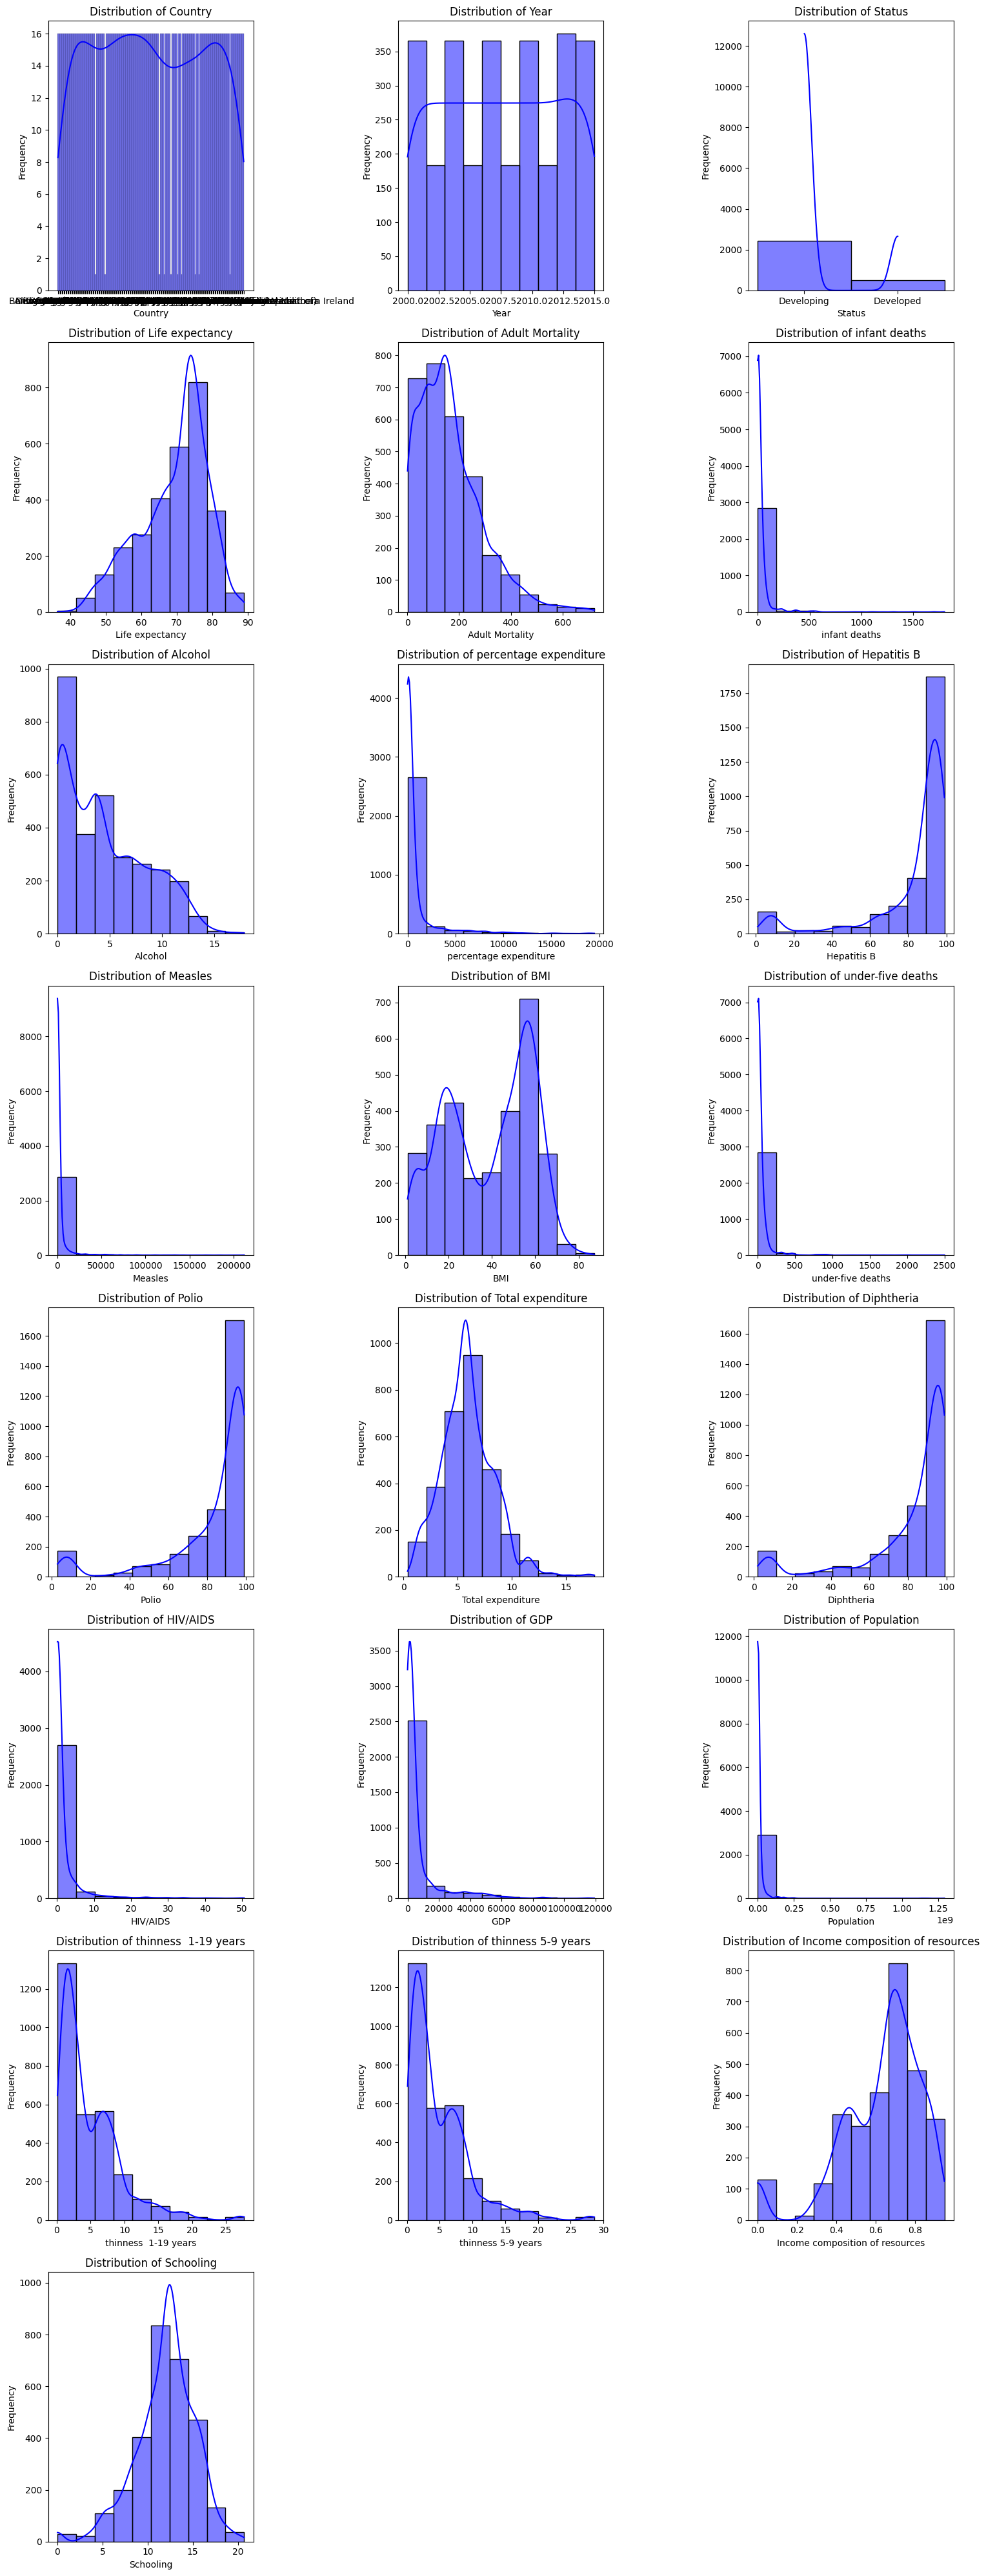

In [15]:
# data distribution in the null value columns
columns = df.columns
num_cols = len(columns)

# Create subplots with 3x3 grid
nrows = (num_cols + 2) // 3  # Calculate rows required for 3 columns per row
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each column in the corresponding subplot
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, bins=10, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 1.6 Encode categorical columns appropriately.

In [16]:
# Label Encoding

categorical_columns = ['Country', 'Status']
for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


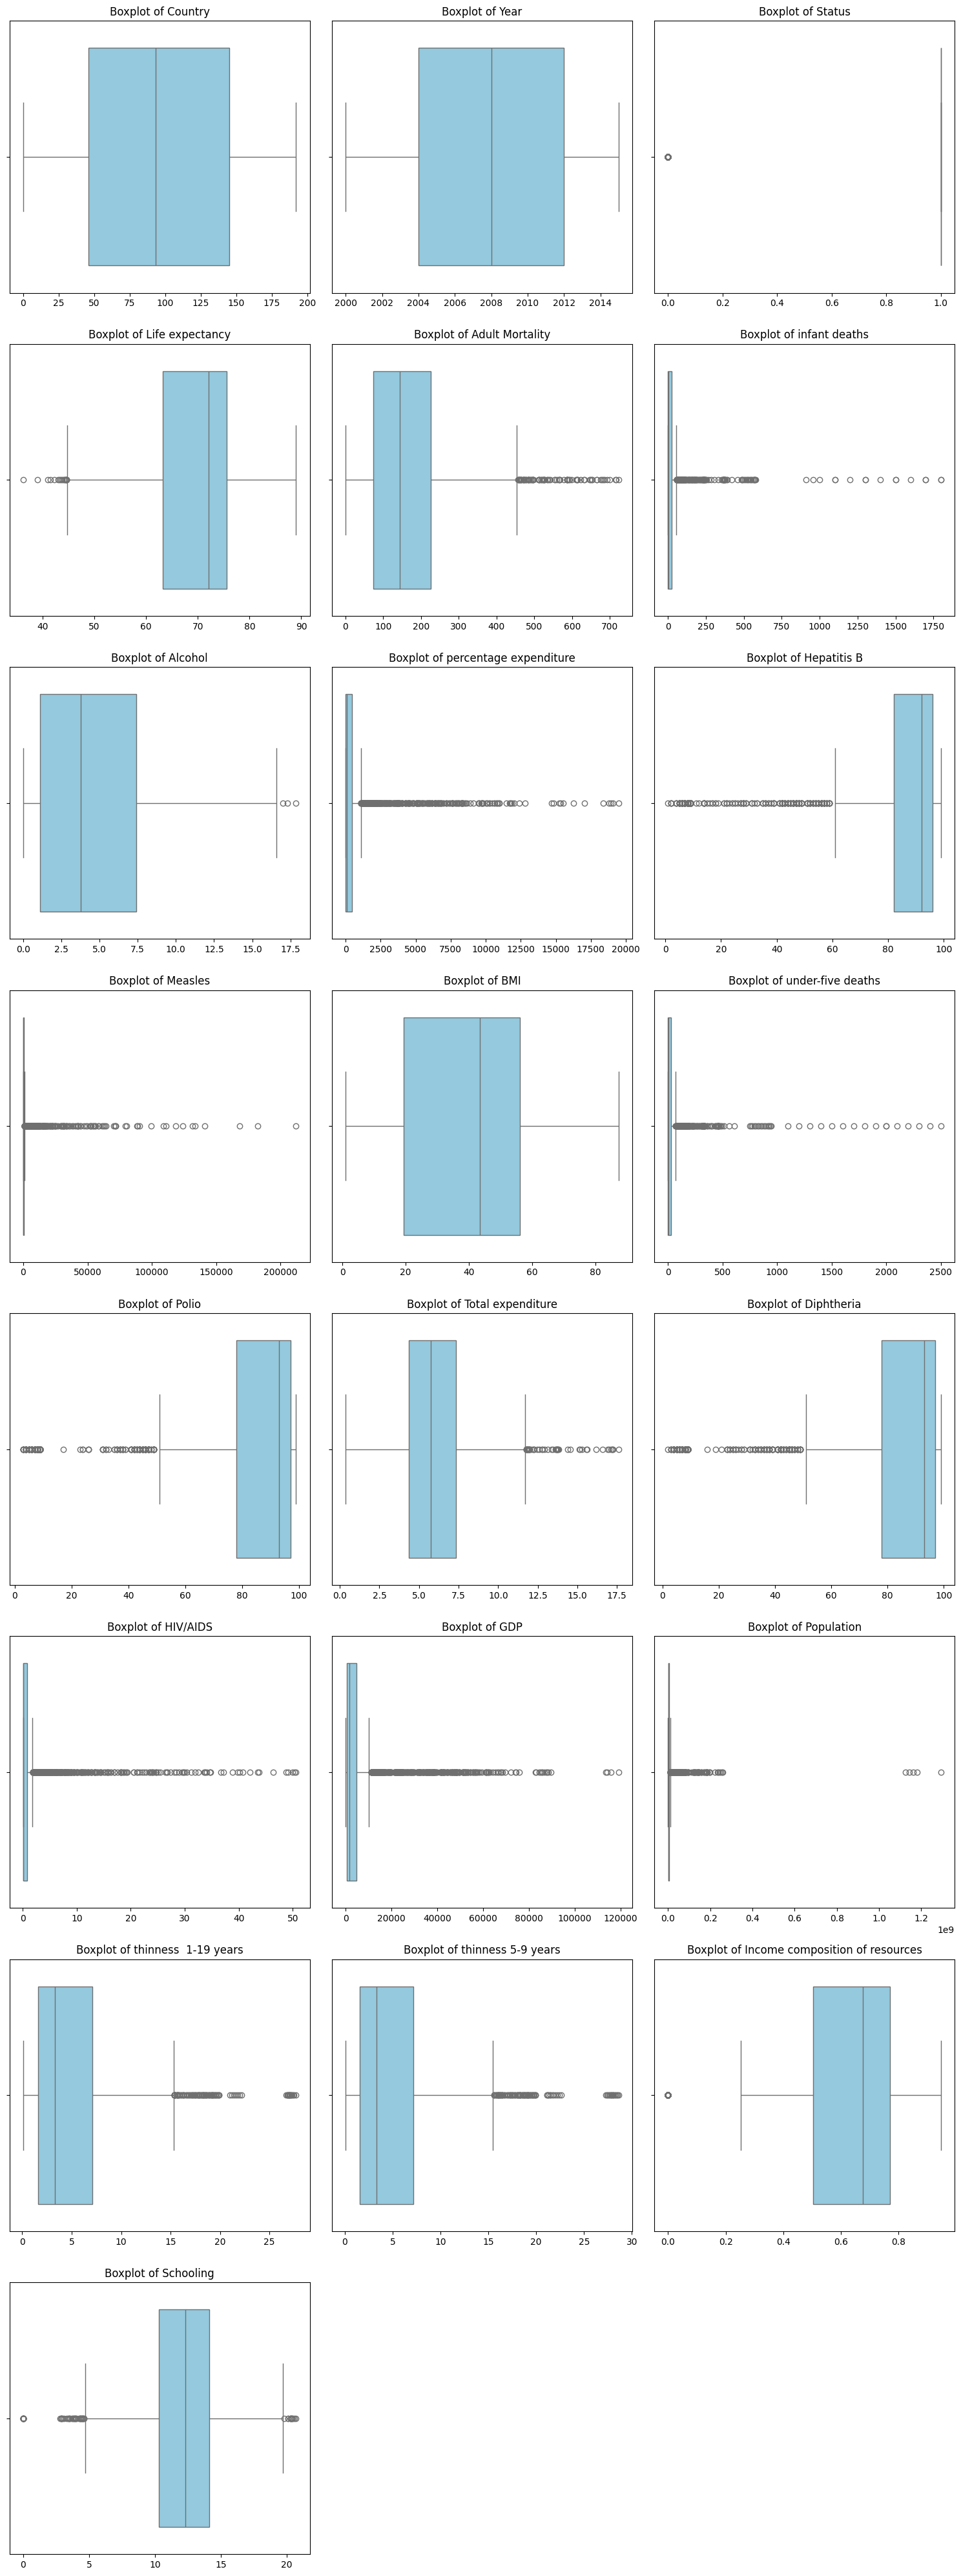

In [17]:
# check outlier for each columns

# Columns for box plots
columns = df.columns

# Determine grid size
num_cols = len(columns)
nrows = (num_cols + 2) // 3  # 3 plots per row

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten to iterate over

# Plot each boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

                                   Status
Status                           1.000000
thinness  1-19 years             0.365814
thinness 5-9 years               0.364179
Adult Mortality                  0.314894
HIV/AIDS                         0.148590
under-five deaths                0.115195
infant deaths                    0.112252
Measles                          0.076955
Population                       0.037606
Year                             0.001864
Country                         -0.031635
Hepatitis B                     -0.127008
Diphtheria                      -0.215281
Polio                           -0.218628
Total expenditure               -0.290431
BMI                             -0.309371
GDP                             -0.445981
percentage expenditure          -0.454261
Income composition of resources -0.460677
Life expectancy                 -0.481415
Schooling                       -0.492984
Alcohol                         -0.579662


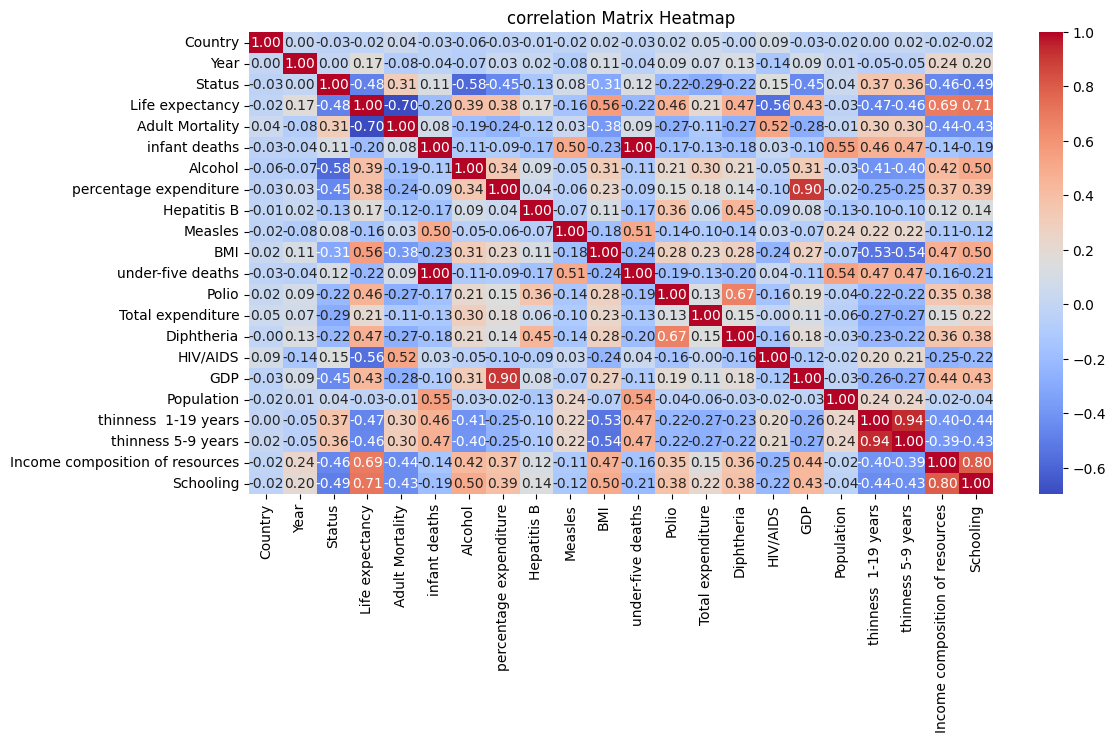

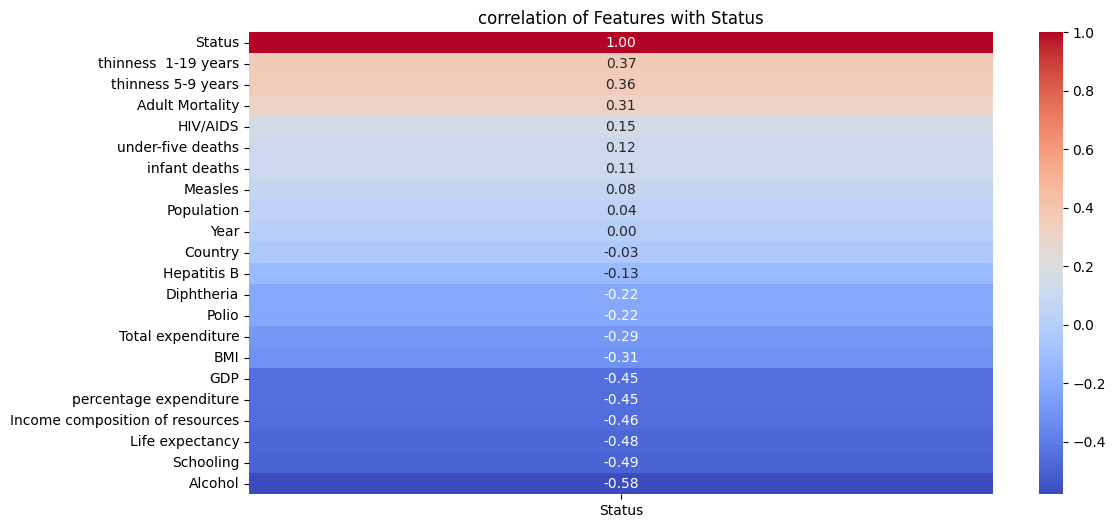

In [18]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix[['Status']].sort_values(by='Status', ascending=False)
print(target_correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('correlation Matrix Heatmap')
plt.show

# Focus heatmap on correlation with placementstatus

plt.figure(figsize=(12,6))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("correlation of Features with Status")
plt.show()


## 2.Classification Models Comparison

### 2.1 Define 'Status' as the target variable and use all other columns as features.

# some independent variable are highly correlated based on the headmap (infant death and under-five death),(percentage expenditure and GDP), (Income composition of resources and Schooling) and (thinness 1-19 years and thinness 5-9 years)

In [22]:
X = df[['thinness  1-19 years', 'Adult Mortality', 
         'Total expenditure', 'BMI', 'GDP', 'Schooling', 
         'Life expectancy', 'Alcohol']]

y = df['Status'] 

### 2.2 Split the data into training and testing sets.

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 2.3 Scale all feature columns, excluding 'Country' and 'Year'.

In [189]:
scaler = StandardScaler()

X_train_standard_scaled = scaler.fit_transform(X_train)

X_test_standard_scaled = scaler.transform(X_test)

### 2.4 Compare classification models including Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, Gaussian Naive Bayes, and XGBoost. Report both accuracy and F1-scores for each model. Optionally, you may perform hyperparameter tuning to optimize model performance.

In [191]:
#different values of max_iter for Logistic Regression

max_iter_values = [100, 150, 200, 250, 300]  # Different values for max_iter

for max_iter in max_iter_values:
    # Build the Logistic Regression model with the current max_iter
    model = LogisticRegression(max_iter=max_iter)
    
    # Train the model
    model.fit(X_train_standard_scaled, y_train)  
    
    # Make predictions
    y_pred = model.predict(X_test_standard_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the results for each max_iter value
    print(f"Results for Logistic Regression with max_iter = {max_iter}:")
    print(f"f1_score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("-" * 80)

Results for Logistic Regression with max_iter = 100:
f1_score: 0.9588
Accuracy: 0.9320
Confusion Matrix:
[[ 82  15]
 [ 25 466]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80        97
           1       0.97      0.95      0.96       491

    accuracy                           0.93       588
   macro avg       0.87      0.90      0.88       588
weighted avg       0.94      0.93      0.93       588

--------------------------------------------------------------------------------
Results for Logistic Regression with max_iter = 150:
f1_score: 0.9588
Accuracy: 0.9320
Confusion Matrix:
[[ 82  15]
 [ 25 466]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80        97
           1       0.97      0.95      0.96       491

    accuracy                           0.93       588
   macro avg       0.87      0.90      0.88       588
weighted avg      

In [192]:
# different values of k-value for KNN 
k_values = [ 3, 5, 7, 9, 11, 13, 15, 17]  

# Store results
results = {}

for k in k_values:
    # Build the KNN model with the current k value
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    model.fit(X_train_standard_scaled, y_train) 
    
    # Make predictions
    y_pred = model.predict(X_test_standard_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store the results
    results[k] = {
        'accuracy': accuracy,
        'f1_score': f1, 
        'confusion_matrix': cm,
        'classification_report': report
    }
    
    # Print the results for each k value
    print(f"Results for KNN with k = {k}:")
    print(f"f1_score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("-" * 80)

Results for KNN with k = 3:
f1_score: 0.9753
Accuracy: 0.9592
Confusion Matrix:
[[ 91   6]
 [ 18 473]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        97
           1       0.99      0.96      0.98       491

    accuracy                           0.96       588
   macro avg       0.91      0.95      0.93       588
weighted avg       0.96      0.96      0.96       588

--------------------------------------------------------------------------------
Results for KNN with k = 5:
f1_score: 0.9701
Accuracy: 0.9507
Confusion Matrix:
[[ 89   8]
 [ 21 470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        97
           1       0.98      0.96      0.97       491

    accuracy                           0.95       588
   macro avg       0.90      0.94      0.91       588
weighted avg       0.95      0.95      0.95       588

-------------

In [193]:
# different values of max_depth for Decision Tree
max_depth_values = [3, 5, 7, 10, 15]  # Different values for max_depth

for max_depth in max_depth_values:
    # Build the Decision Tree model with the current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Train the model
    model.fit(X_train_standard_scaled, y_train)  
    
    # Make predictions
    y_pred = model.predict(X_test_standard_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results for each max_depth value
    print(f"Results for Decision Tree with max_depth = {max_depth}:")
    print(f"f1_score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("-" * 80)

Results for Decision Tree with max_depth = 3:
f1_score: 0.9538
Accuracy: 0.9252
Confusion Matrix:
[[ 90   7]
 [ 37 454]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        97
           1       0.98      0.92      0.95       491

    accuracy                           0.93       588
   macro avg       0.85      0.93      0.88       588
weighted avg       0.94      0.93      0.93       588

--------------------------------------------------------------------------------
Results for Decision Tree with max_depth = 5:
f1_score: 0.9692
Accuracy: 0.9490
Confusion Matrix:
[[ 86  11]
 [ 19 472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        97
           1       0.98      0.96      0.97       491

    accuracy                           0.95       588
   macro avg       0.90      0.92      0.91       588
weighted avg       0.95      0.9

In [194]:
# different values of n_estimators and max_depth for Randomforest
n_estimators = [100,120,140,160,180,200]
max_depth = [100,120,140,160,180,200]

# Ensure y_train and y_test are 1D
y_train = np.ravel(y_train)  # Convert to NumPy array and flatten
y_test = np.ravel(y_test)    # Convert to NumPy array and flatten

for i,j in zip(n_estimators, max_depth):
    print(f'n_estimators : ',i)
    print(f'max_depth :', j)
    rfcl = RandomForestClassifier(n_estimators = i,max_depth =j, random_state = 42)
    rfcl = rfcl.fit(X_train_standard_scaled, y_train)
    
    y_pred = rfcl.predict(X_test_standard_scaled)

    print(f'f1_score : ',f1_score(y_test, y_pred))
    print(f'accuracy_score : ',accuracy_score(y_test, y_pred))
    print(f'confusion_matrix : ',confusion_matrix(y_test,y_pred))
    print(f'classification_report',classification_report(y_test,y_pred))
    print('-'*80)
    print('\n')


n_estimators :  100
max_depth : 100
f1_score :  0.9867211440245147
accuracy_score :  0.9778911564625851
confusion_matrix :  [[ 92   5]
 [  8 483]]
classification_report               precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.99      0.98      0.99       491

    accuracy                           0.98       588
   macro avg       0.95      0.97      0.96       588
weighted avg       0.98      0.98      0.98       588

--------------------------------------------------------------------------------


n_estimators :  120
max_depth : 120
f1_score :  0.9877551020408164
accuracy_score :  0.9795918367346939
confusion_matrix :  [[ 92   5]
 [  7 484]]
classification_report               precision    recall  f1-score   support

           0       0.93      0.95      0.94        97
           1       0.99      0.99      0.99       491

    accuracy                           0.98       588
   macro avg       0.96      0.97 

In [195]:

# Different kernel types for SVM classifier
kernel_types = ['linear', 'rbf']

# Loop through different kernel types
for kernel in kernel_types:
    # Initialize SVM classifier with the specific kernel
    svm_classifier = SVC(kernel=kernel, random_state=42)
    
    # Train the classifier
    svm_classifier.fit(X_train_standard_scaled, y_train)
    
    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_standard_scaled)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  

    # Print results
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")
    print(f"Kernel: {kernel}, F1 Score: {f1}")


Kernel: linear, Accuracy: 0.9319727891156463
Kernel: linear, F1 Score: 0.9586776859504132
Kernel: rbf, Accuracy: 0.9404761904761905
Kernel: rbf, F1 Score: 0.9638802889576884


In [196]:
# Choose the appropriate Naive Bayes model
# Use GaussianNB for continuous features
gaussian_nb = GaussianNB()

# Train the model on the training data
gaussian_nb.fit(X_train_standard_scaled, y_train)

# Make predictions on the test data
y_pred_gaussian = gaussian_nb.predict(X_test_standard_scaled)  # Use X_test_standard_scaled

# Calculate the accuracy of the Gaussian Naive Bayes model
f1_score_gaussian = f1_score(y_test, y_pred_gaussian)
print(f"Gaussian Naive Bayes f1_score: {f1_score_gaussian}")

accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gaussian}")


Gaussian Naive Bayes f1_score: 0.9371671991480298
Gaussian Naive Bayes Accuracy: 0.8996598639455783


In [197]:
n_estimators = [100,120,140,160,180,200]
max_depth = [100,120,140,160,180,200]

# Ensure y_train and y_test are 1D
y_train = np.ravel(y_train)  # Convert to NumPy array and flatten
y_test = np.ravel(y_test)    # Convert to NumPy array and flatten

for i,j in zip(n_estimators, max_depth):
    print(f'n_estimators : ',i)
    print(f'max_depth :', j)
    xgb_clf = XGBClassifier(n_estimators=i,max_depth=j,random_state=42)
    xgbclf = xgb_clf.fit(X_train_standard_scaled, y_train)
    
    y_pred = xgbclf.predict(X_test_standard_scaled)

    print(f'f1_score : ',f1_score(y_test, y_pred))
    print(f'accuracy_score : ',accuracy_score(y_test, y_pred))
    print(f'confusion_matrix : ',confusion_matrix(y_test,y_pred))
    print(f'classification_report',classification_report(y_test,y_pred))
    print('-'*80)
    print('\n')


n_estimators :  100
max_depth : 100
f1_score :  0.9908443540183113
accuracy_score :  0.9846938775510204
confusion_matrix :  [[ 92   5]
 [  4 487]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.95      0.95        97
           1       0.99      0.99      0.99       491

    accuracy                           0.98       588
   macro avg       0.97      0.97      0.97       588
weighted avg       0.98      0.98      0.98       588

--------------------------------------------------------------------------------


n_estimators :  120
max_depth : 120
f1_score :  0.9918699186991871
accuracy_score :  0.9863945578231292
confusion_matrix :  [[ 92   5]
 [  3 488]]
classification_report               precision    recall  f1-score   support

           0       0.97      0.95      0.96        97
           1       0.99      0.99      0.99       491

    accuracy                           0.99       588
   macro avg       0.98      0.97 

### 2.5 Identify and report the best-performing classification model for this dataset.

## 3.Regression Models Comparison

### 3.1 Define 'Life expectancy' as the target variable and use all other columns as features.

                                 Life expectancy
Life expectancy                         1.000000
Schooling                               0.713054
Income composition of resources         0.688662
BMI                                     0.556901
Diphtheria                              0.472211
Polio                                   0.458399
GDP                                     0.430461
Alcohol                                 0.388918
percentage expenditure                  0.381418
Total expenditure                       0.208844
Year                                    0.170819
Hepatitis B                             0.170219
Country                                -0.016402
Population                             -0.029014
Measles                                -0.157767
infant deaths                          -0.196769
under-five deaths                      -0.222738
thinness 5-9 years                     -0.462473
thinness  1-19 years                   -0.468002
Status              

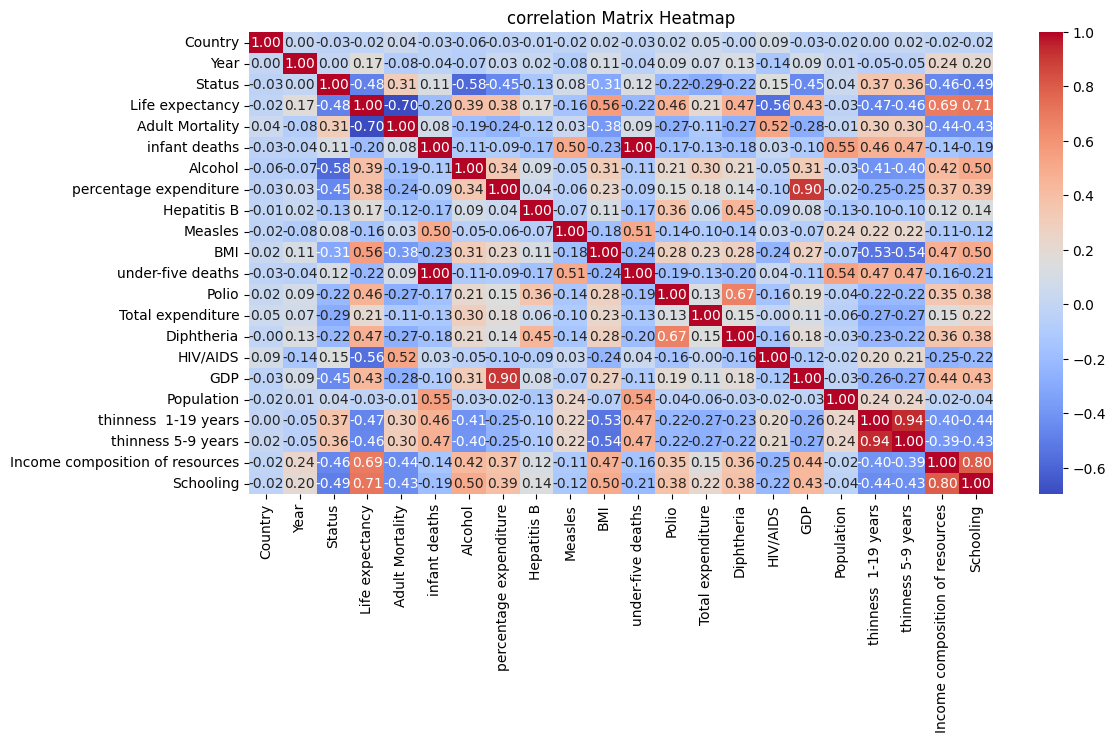

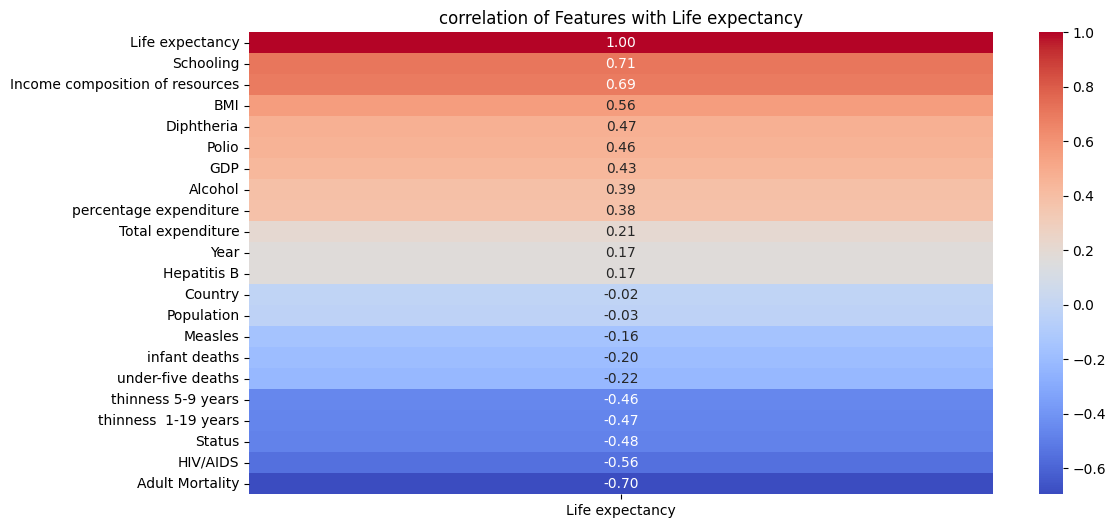

In [186]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy', ascending=False)
print(target_correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('correlation Matrix Heatmap')
plt.show

# Focus heatmap on correlation with placementstatus

plt.figure(figsize=(12,6))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("correlation of Features with Life expectancy")
plt.show()

In [128]:
X = df[['Schooling', 'BMI', 'Diphtheria', 'Polio', 'GDP', 'Alcohol', 'Total expenditure', 'under-five deaths', 'thinness 5-9 years', 
        'Status', 'HIV/AIDS', 'Adult Mortality']]

y = df['Life expectancy'] 

### 3.2 Split the data into training and testing sets.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3.3 Scale all feature columns, excluding 'Country', 'Year', and 'Status'.

In [130]:
scaler = StandardScaler()

X_train_standard_scaled = scaler.fit_transform(X_train)

X_test_standard_scaled = scaler.transform(X_test)

### 3.4 Compare regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Neighbors Regressor. Report R² score and Mean Absolute Error for each model. Optionally, you may perform hyperparameter tuning to enhance performance.

In [131]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_standard_scaled,y_train)
y_pred = model.predict(X_test_standard_scaled)

print("Slope (Coefficients):", model.coef_)
print("Intercept:", model.intercept_)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Slope (Coefficients): [ 3.09066778  0.97489095  1.02306304  0.65698789  0.65507004  0.10534676
  0.06466338 -0.32034991 -0.2288258  -0.67999013 -2.52674063 -2.70274237]
Intercept: 69.2867659574468
R² Score: 0.8120572588744726
Mean Absolute Error (MAE): 2.9513195558102296
Mean Squared Error (MSE): 16.28850220154265


In [113]:
# DecisionTreeRegressor


# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train_standard_scaled, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test_standard_scaled)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree MAE: 1.598469387755102
Decision Tree MSE: 7.077125850340137
Decision Tree R-squared: 0.9183415138392967


In [114]:
# RandomForestRegressor

# Initialize the model
random_forest = RandomForestRegressor(random_state=42)

# Train the model
random_forest.fit(X_train_standard_scaled, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_standard_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest MAE: 1.0949285714285677
Random Forest MSE: 2.8426662517006727
Random Forest R-squared: 0.9672002691936246


In [69]:
# Support Vector Regressor

# Initialize the model
svr = SVR()

# Train the model
svr.fit(X_train_standard_scaled, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test_standard_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR R-squared: {r2_svr}")

SVR MAE: 0.04146161440018767
SVR MSE: 0.002969811995926733
SVR R-squared: 0.9784409121145633


In [115]:
#  K-Neighbors Regressor

# Initialize the model
knn = KNeighborsRegressor()

# Train the model
knn.fit(X_train_standard_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_standard_scaled)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN MAE: {mae_knn}")
print(f"KNN MSE: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")

KNN MAE: 1.8391836734693878
KNN MSE: 6.655825850340135
KNN R-squared: 0.9232026284989789


### 3.5 Identify and report the best-performing regression model for this dataset.

# Unsupervised Learning – k-Means

## k-Means Clustering Steps:

In [140]:
url = 'https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv'
df = pd.read_csv(url)


In [141]:
# first 5 row of the datset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [142]:
# last 5 row of the dataset
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Initial Visualization: Create a scatter plot using 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis to visualize the data distribution.

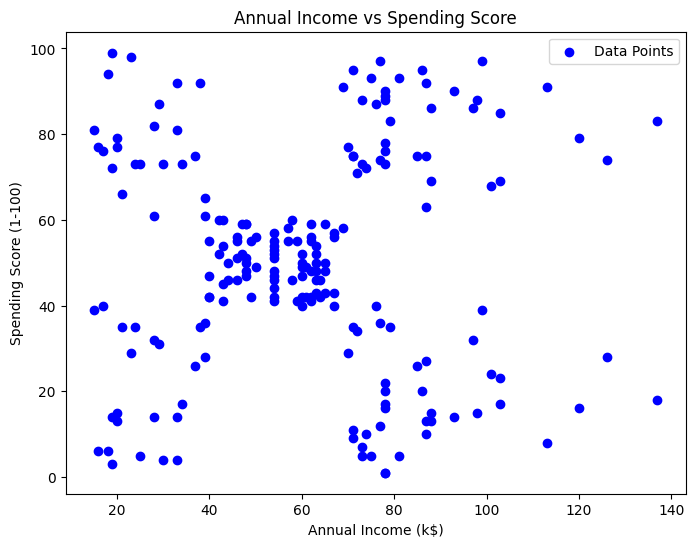

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='blue', label='Data Points')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Feature Selection: Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for k-Means clustering.

In [144]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

### Determine Optimal k-Value: Calculate the Within-Cluster Sum of Squares (WCSS) for a range of k-values.

In [147]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.

### Plot the Elbow Chart: Plot the elbow method graph to visually determine the optimal k-value.

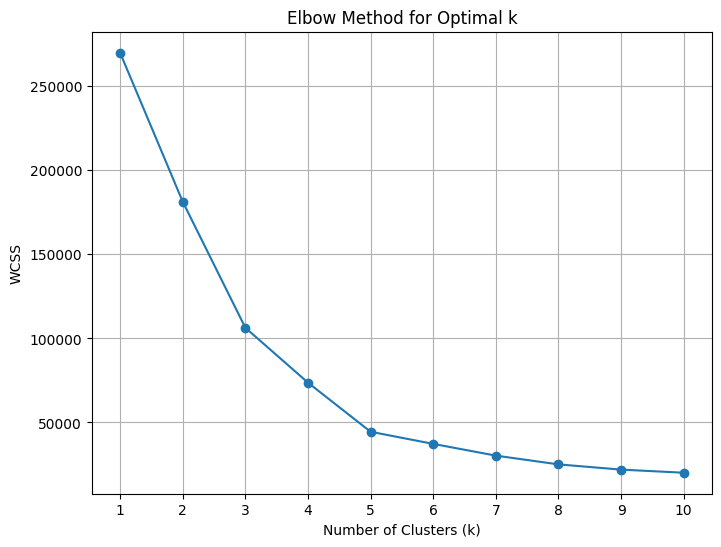

In [148]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()

### Build k-Means Model:
### Construct the k-Means model using the optimal k-value determined in the previous step.
### Identify the clusters and centroids from the model.


In [161]:
optimal_k = 5  # Based on the elbow chart
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_x

C:\Users\HI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualization of Clusters: Plot the scatter plot again, this time including the centroids. Color the data points according to their respective clusters to visualize the clustering results effectively.

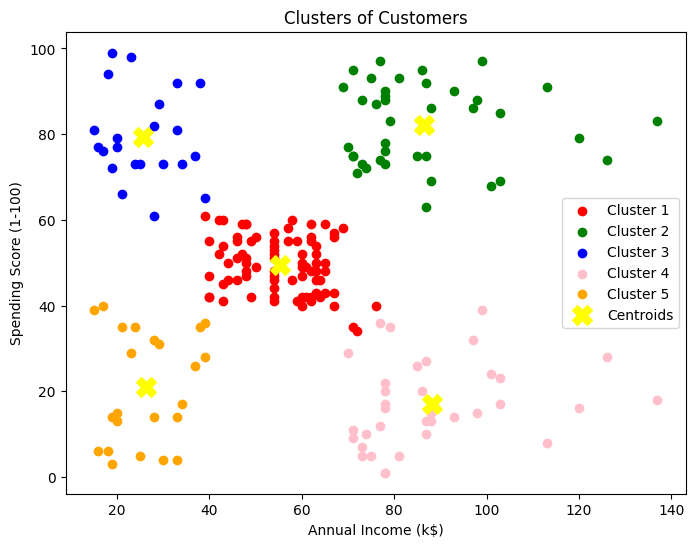

In [163]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue','pink', 'orange']
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', marker='X', s=200, label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
